In [44]:
# 1. Import Library

import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from scipy.stats import zscore

sns.set_theme(style="whitegrid", palette="muted")
pd.options.display.max_columns = None
RANDOM_STATE = 42


In [45]:
 # 2. Load Dataset (Excel)
file_path = "customer_eloyalty.xlsx"
df = pd.read_excel(file_path)

print("=== 5 Baris Pertama Data ===")
print(df.head())

print("\n=== Info Data ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe(include='all'))


=== 5 Baris Pertama Data ===
   Nomor  AL1  AL2  AL3  AL4  BL1  BL2  BL3  Ig1  Ig2  Ig3  Bv1  Bv2  Ab1  \
0      1    2    3    3    3    2    1    3    3    3    3    3    1    3   
1      2    4    4    4    3    2    2    3    3    3    4    4    3    3   
2      3    5    4    4    3    4    2    3    4    4    4    3    4    4   
3      4    3    3    3    4    2    2    2    4    4    4    3    3    4   
4      5    4    4    5    5    3    4    4    3    3    2    3    4    4   

   Ab2  Ab3  Pb1  Pb2  Gq1  Gq2  Gq3  RQ1  RQ2  Xr1  Xr2  CB1  CB2  EB1  EB2  \
0    3    3    3    3    2    3    2    3    3    2    3    2    3    3    3   
1    4    4    4    4    3    4    3    4    4    4    4    4    4    3    4   
2    4    4    4    3    5    4    5    4    3    5    4    5    5    4    4   
3    3    3    3    4    4    2    4    2    2    4    4    5    2    4    5   
4    4    3    3    4    5    4    3    3    3    4    4    5    2    4    5   

   BB1  BB2  EW1  EW2  EW3 

In [46]:
# 3. Reliabilitas & Validitas

def cronbach_alpha(df_items):
    itemscores = df_items.to_numpy()
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = df_items.shape[1]
    return nitems / (nitems - 1) * (1 - itemvars.sum() / tscores.var(ddof=1))

dimensi_items = {
    "AL": ['AL1', 'AL2', 'AL3', 'AL4'],
    "BL": ['BL1', 'BL2', 'BL3'],
    "Ig": ['Ig1', 'Ig2', 'Ig3'],
    "Bv": ['Bv1', 'Bv2'],
    "Ab": ['Ab1', 'Ab2', 'Ab3'],
    "Pb": ['Pb1', 'Pb2'],
    "Gq": ['Gq1', 'Gq2', 'Gq3'],
    "RQ": ['RQ1', 'RQ2'],
    "Xr": ['Xr1', 'Xr2'],
    "CB": ['CB1', 'CB2'],
    "EB": ['EB1', 'EB2'],
    "BB": ['BB1', 'BB2'],
    "EW": ['EW1', 'EW2', 'EW3'],
    "SA": ['SA1', 'SA2', 'SA3', 'SA4'],
    "VR": ['VR1', 'VR2'],
    "SP": ['SP1', 'SP2'],
    "ePQ": ['ePQ1', 'ePQ2', 'ePQ3', 'ePQ4', 'ePQ5', 'ePQ6', 'ePQ7', 'ePQ8'],
    "ReV": ['ReV1', 'ReV2', 'ReV3', 'ReV4', 'ReV5']
}

alpha_results = {}
for dim, items in dimensi_items.items():
    try:
        df_subset = df[items]
        alpha = cronbach_alpha(df_subset)
        alpha_results[dim] = round(alpha, 3)
    except KeyError:
        alpha_results[dim] = "Item tidak ditemukan di dataset"

for dim, alpha in alpha_results.items():
    print(f"Cronbach's Alpha untuk {dim}: {alpha}")


Cronbach's Alpha untuk AL: 0.861
Cronbach's Alpha untuk BL: 0.809
Cronbach's Alpha untuk Ig: 0.822
Cronbach's Alpha untuk Bv: 0.737
Cronbach's Alpha untuk Ab: 0.792
Cronbach's Alpha untuk Pb: 0.759
Cronbach's Alpha untuk Gq: 0.77
Cronbach's Alpha untuk RQ: 0.703
Cronbach's Alpha untuk Xr: 0.783
Cronbach's Alpha untuk CB: 0.754
Cronbach's Alpha untuk EB: 0.801
Cronbach's Alpha untuk BB: 0.769
Cronbach's Alpha untuk EW: 0.862
Cronbach's Alpha untuk SA: 0.872
Cronbach's Alpha untuk VR: 0.811
Cronbach's Alpha untuk SP: 0.842
Cronbach's Alpha untuk ePQ: 0.91
Cronbach's Alpha untuk ReV: 0.896


In [47]:
# @title
!pip install factor-analyzer


=== Uji Kelayakan Data ===
KMO Measure: 0.964
Bartlett’s Test Chi-Square: 17848.759 p-value: 0.0
✅ Data layak untuk analisis faktor (EFA).

Eigenvalues: [22.33458181  2.77506707  2.06177094  1.71843902  1.57045458  1.37436681
  1.20966081  1.11189623  1.04997246  0.97995927  0.87244692  0.79065053
  0.75095847  0.70592634  0.69228574  0.67275303  0.62746399  0.60748361
  0.57617606  0.55628661  0.52966121  0.51686714  0.48011557  0.47143746
  0.44698256  0.4395404   0.42897428  0.40921219  0.40423095  0.39866175
  0.39647981  0.37639687  0.36490162  0.35679619  0.33698101  0.33346273
  0.31245312  0.30858376  0.30067855  0.29235849  0.28055137  0.27316403
  0.26106574  0.25463078  0.24391676  0.23190442  0.22959917  0.20700413
  0.20206299  0.1901452   0.18859858  0.18065141  0.1581616   0.15516784]


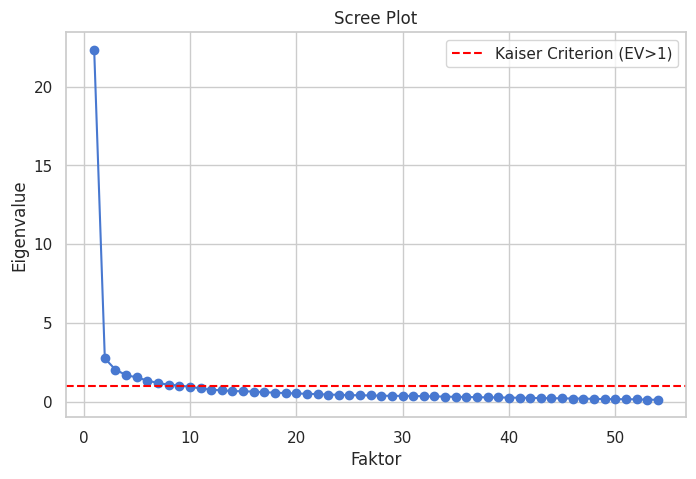


=== Factor Loadings (seluruhnya) ===


,Faktor1,Faktor2,Faktor3,Faktor4,Faktor5
AL1,0.156,0.192,0.198,0.626,0.211
AL2,0.157,0.091,0.280,0.640,0.192
AL3,0.162,0.143,0.219,0.666,0.169
AL4,0.130,0.174,0.251,0.612,0.161
BL1,0.148,0.270,0.054,0.525,0.208
BL2,0.130,0.315,0.075,0.493,0.115
BL3,0.209,0.341,0.231,0.532,0.187
Ig1,0.288,0.214,0.186,0.524,0.136
Ig2,0.264,0.310,0.128,0.572,0.106
Ig3,0.274,0.424,0.172,0.398,0.073



=== Factor Loadings (hanya >= 0.4) ===


,Faktor1,Faktor2,Faktor3,Faktor4,Faktor5
AL1,NaN,NaN,NaN,0.626,NaN
AL2,NaN,NaN,NaN,0.640,NaN
AL3,NaN,NaN,NaN,0.666,NaN
AL4,NaN,NaN,NaN,0.612,NaN
BL1,NaN,NaN,NaN,0.525,NaN
BL2,NaN,NaN,NaN,0.493,NaN
BL3,NaN,NaN,NaN,0.532,NaN
Ig1,NaN,NaN,NaN,0.524,NaN
Ig2,NaN,NaN,NaN,0.572,NaN
Ig3,NaN,0.424,NaN,NaN,NaN


In [48]:
# 4. Exploratory Factor Analysis (EFA)

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

X_fa = df.iloc[:, 1:]

kmo_all, kmo_model = calculate_kmo(X_fa)
chi_square_value, p_value = calculate_bartlett_sphericity(X_fa)

print("=== Uji Kelayakan Data ===")
print("KMO Measure:", round(kmo_model, 3))
print("Bartlett’s Test Chi-Square:", round(chi_square_value, 3), "p-value:", p_value)

if kmo_model >= 0.6 and p_value < 0.05:
    print("✅ Data layak untuk analisis faktor (EFA).")
else:
    print("⚠️ Data kurang layak untuk EFA, coba cek ulang variabel / data.")

fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(X_fa)

ev, v = fa.get_eigenvalues()
print("\nEigenvalues:", ev)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.axhline(1, color="red", linestyle="--", label="Kaiser Criterion (EV>1)")
plt.xlabel("Faktor")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.legend()
plt.show()

loadings = fa.loadings_
loadings_df = pd.DataFrame(
    loadings,
    index=X_fa.columns,
    columns=[f"Faktor{i+1}" for i in range(loadings.shape[1])]
).round(3)

print("\n=== Factor Loadings (seluruhnya) ===")
display(loadings_df)

print("\n=== Factor Loadings (hanya >= 0.4) ===")
display(loadings_df.where(loadings_df.abs() >= 0.4).dropna(how="all"))


In [49]:
# 5. Preprocessing

X = df.drop(columns=["Nomor"])

missing_table = pd.DataFrame({
    "Missing Values": X.isnull().sum(),
    "Persentase (%)": (X.isnull().sum() / len(X)) * 100
}).sort_values(by="Missing Values", ascending=False)

print("=== Tabel Missing Values ===")
display(missing_table)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n=== Shape Data ===")
print(f"Sebelum scaling: {X.shape}")
print(f"Setelah scaling: {df_scaled.shape}")

print("\n=== 5 Baris Pertama Hasil Scaling ===")
display(df_scaled.head())


=== Tabel Missing Values ===


,Missing Values,Persentase (%)
AL1,0,0.0
AL2,0,0.0
AL3,0,0.0
AL4,0,0.0
BL1,0,0.0
BL2,0,0.0
BL3,0,0.0
Ig1,0,0.0
Ig2,0,0.0
Ig3,0,0.0



=== Shape Data ===
Sebelum scaling: (492, 54)
Setelah scaling: (492, 54)

=== 5 Baris Pertama Hasil Scaling ===


,AL1,AL2,AL3,AL4,BL1,BL2,BL3,Ig1,Ig2,Ig3,Bv1,Bv2,Ab1,Ab2,Ab3,Pb1,Pb2,Gq1,Gq2,Gq3,RQ1,RQ2,Xr1,Xr2,CB1,CB2,EB1,EB2,BB1,BB2,EW1,EW2,EW3,SA1,SA2,SA3,SA4,VR1,VR2,SP1,SP2,ePQ1,ePQ2,ePQ3,ePQ4,ePQ5,ePQ6,ePQ7,ePQ8,ReV1,ReV2,ReV3,ReV4,ReV5
0,-1.753980,-0.666080,-0.461650,-0.499004,-1.572546,-2.324068,-0.501180,-0.788444,-0.797271,-0.968871,-0.777908,-3.432629,-0.924838,-0.914240,-0.965643,-0.798052,-0.964366,-1.870606,-0.634627,-2.211673,-0.702242,-0.685767,-2.062524,-1.001043,-2.321504,-0.919765,-0.855902,-1.025199,-0.900856,-0.932523,-0.960730,-0.940800,0.312774,-0.821937,-3.096641,-2.047726,-3.169042,-0.760442,0.480598,-0.868845,-2.099924,-2.010187,0.287564,-0.917160,-0.855823,-2.166756,0.313062,0.239235,-0.831954,-0.962901,-0.953737,-2.127282,-0.981171,-1.034666
1,0.683755,0.634361,0.691303,-0.499004,-1.572546,-1.239209,-0.501180,-0.788444,-0.797271,0.362650,0.523898,-0.810186,-0.924838,0.420496,0.391775,0.417556,0.304265,-0.774965,0.460940,-0.966658,0.438032,0.457953,0.302888,0.255368,0.090703,0.231696,-0.855902,0.172896,0.330314,0.310841,0.309913,-0.940800,0.312774,-0.821937,0.397734,0.400588,0.308658,0.438717,1.651165,0.392134,0.325340,0.325142,-0.998632,0.257951,0.307340,0.242383,1.453997,1.404618,1.333767,0.258097,0.210627,0.216778,0.152012,0.117044
2,1.902623,0.634361,0.691303,-0.499004,0.808047,-1.239209,-0.501180,0.487590,0.541491,0.362650,-0.777908,0.501036,0.378945,0.420496,0.391775,0.417556,-0.964366,1.416316,0.460940,1.523372,0.438032,-0.685767,1.485594,0.255368,1.296806,1.383157,0.337026,0.172896,0.330314,0.310841,0.309913,0.290247,0.312774,1.606849,1.562525,1.624745,1.467891,0.438717,1.651165,0.392134,1.537972,-0.842522,-0.998632,0.257951,0.307340,1.446953,-0.827874,0.239235,0.250907,0.258097,-0.953737,1.388808,0.152012,0.117044
3,-0.535113,-0.666080,-0.461650,0.716392,-1.572546,-1.239209,-1.601986,0.487590,0.541491,0.362650,-0.777908,-0.810186,0.378945,-0.914240,-0.965643,-0.798052,0.304265,0.320675,-1.730195,0.278357,-1.842515,-1.829486,0.302888,0.255368,1.296806,-2.071225,0.337026,1.370991,0.330314,0.310841,0.309913,0.290247,0.312774,-0.821937,1.562525,-0.823569,1.467891,0.438717,-1.860534,-0.868845,-0.887292,-0.842522,-0.998632,-2.092272,-0.855823,0.242383,-0.827874,1.404618,1.333767,0.258097,-0.953737,0.216778,-2.114354,0.117044
4,0.683755,0.634361,1.844255,1.931789,-0.382250,0.930509,0.599626,-0.788444,-0.797271,-2.300391,-0.777908,0.501036,0.378945,0.420496,-0.965643,-0.798052,0.304265,1.416316,0.460940,-0.966658,-0.702242,-0.685767,0.302888,0.255368,1.296806,-2.071225,0.337026,1.370991,0.330314,0.310841,0.309913,0.290247,0.312774,-0.821937,1.562525,-0.823569,1.467891,0.438717,-1.860534,-0.868845,-0.887292,-0.842522,-0.998632,-2.092272,-0.855823,1.446953,0.313062,0.239235,0.250907,0.258097,-0.953737,0.216778,-0.981171,0.117044


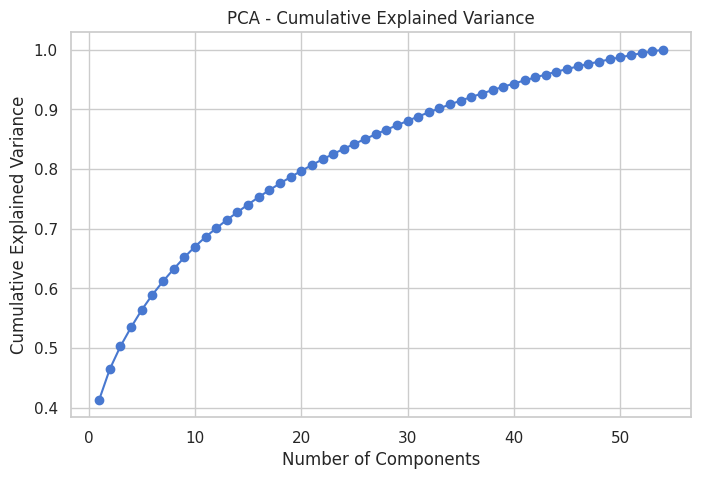

Jumlah komponen optimal: 33
Shape data setelah PCA: (492, 33)


In [50]:
# 6. Principal Component Analysis

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

n_components = np.argmax(explained_variance >= 0.9) + 1
print(f"Jumlah komponen optimal: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("Shape data setelah PCA:", X_pca.shape)

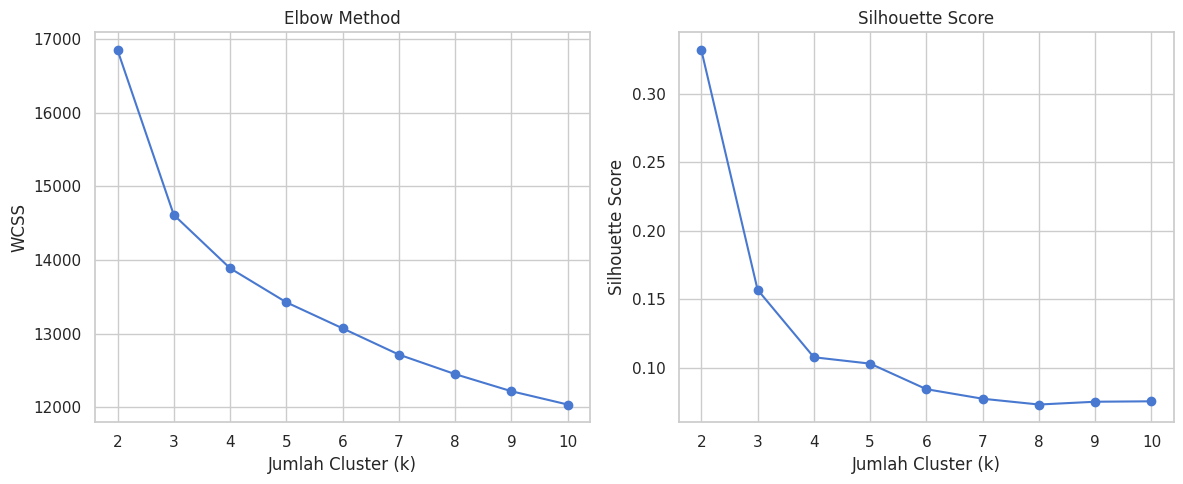

In [51]:
# 7. Clustering

wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()





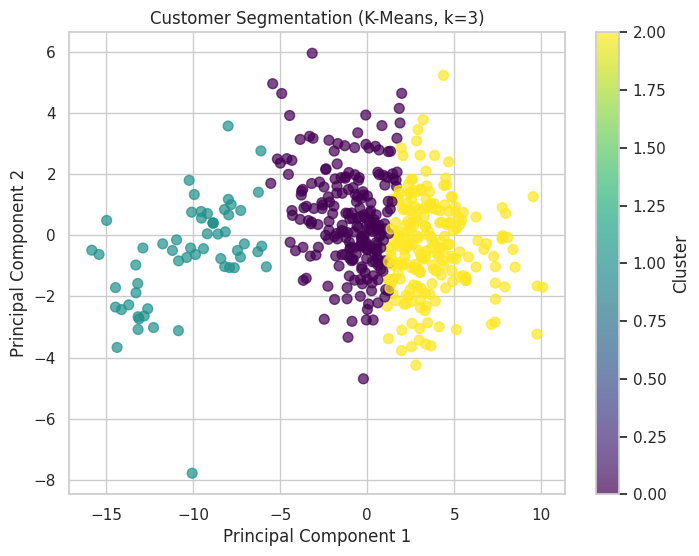

Jumlah data per cluster:
Cluster
0    219
2    215
1     58
Name: count, dtype: int64


,Nomor,AL1,AL2,AL3,AL4,BL1,BL2,BL3,Ig1,Ig2,Ig3,Bv1,Bv2,Ab1,Ab2,Ab3,Pb1,Pb2,Gq1,Gq2,Gq3,RQ1,RQ2,Xr1,Xr2,CB1,CB2,EB1,EB2,BB1,BB2,EW1,EW2,EW3,SA1,SA2,SA3,SA4,VR1,VR2,SP1,SP2,ePQ1,ePQ2,ePQ3,ePQ4,ePQ5,ePQ6,ePQ7,ePQ8,ReV1,ReV2,ReV3,ReV4,ReV5
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,220.954338,3.292237,3.392694,3.196347,3.269406,3.164384,2.899543,3.301370,3.506849,3.497717,3.579909,3.433790,3.424658,3.529680,3.506849,3.515982,3.497717,3.543379,3.589041,3.410959,3.630137,3.506849,3.433790,3.675799,3.675799,3.894977,3.799087,3.621005,3.776256,3.602740,3.589041,3.680365,3.639269,3.675799,3.575342,3.589041,3.579909,3.680365,3.515982,3.429224,3.616438,3.671233,3.680365,3.762557,3.803653,3.767123,3.794521,3.684932,3.785388,3.767123,3.735160,3.748858,3.799087,3.776256,3.885845
1,303.758621,2.431034,2.603448,2.448276,2.482759,2.500000,2.362069,2.258621,2.568966,2.568966,2.775862,2.672414,2.724138,2.758621,2.810345,2.913793,2.534483,2.862069,2.362069,2.482759,2.896552,2.551724,2.517241,2.275862,2.672414,2.672414,2.551724,2.586207,2.672414,2.620690,2.724138,2.603448,2.534483,2.603448,2.379310,2.344828,2.465517,2.465517,2.413793,2.310345,2.534483,2.482759,2.362069,2.534483,2.275862,2.293103,2.568966,2.396552,2.431034,2.344828,2.517241,2.500000,2.344828,2.500000,2.586207
2,257.074419,3.860465,3.879070,3.865116,3.804651,3.702326,3.600000,3.934884,4.013953,3.972093,4.134884,4.013953,4.055814,4.148837,4.102326,4.125581,4.120930,4.223256,4.190698,4.046512,4.162791,4.013953,4.060465,4.209302,4.223256,4.293023,4.134884,4.120930,4.255814,4.162791,4.190698,4.144186,4.223256,4.153488,4.130233,4.083721,4.093023,4.130233,4.083721,4.097674,4.074419,4.130233,4.130233,4.125581,4.162791,4.093023,4.134884,4.125581,4.172093,4.153488,4.186047,4.246512,4.227907,4.325581,4.265116


In [52]:
#8. Clustering (K-Means & Visualisasi)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

df['Cluster'] = labels

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation (K-Means, k=3)")
plt.colorbar(label="Cluster")
plt.show()

print("Jumlah data per cluster:")
print(df['Cluster'].value_counts())

cluster_means = df.groupby('Cluster').mean()
cluster_means

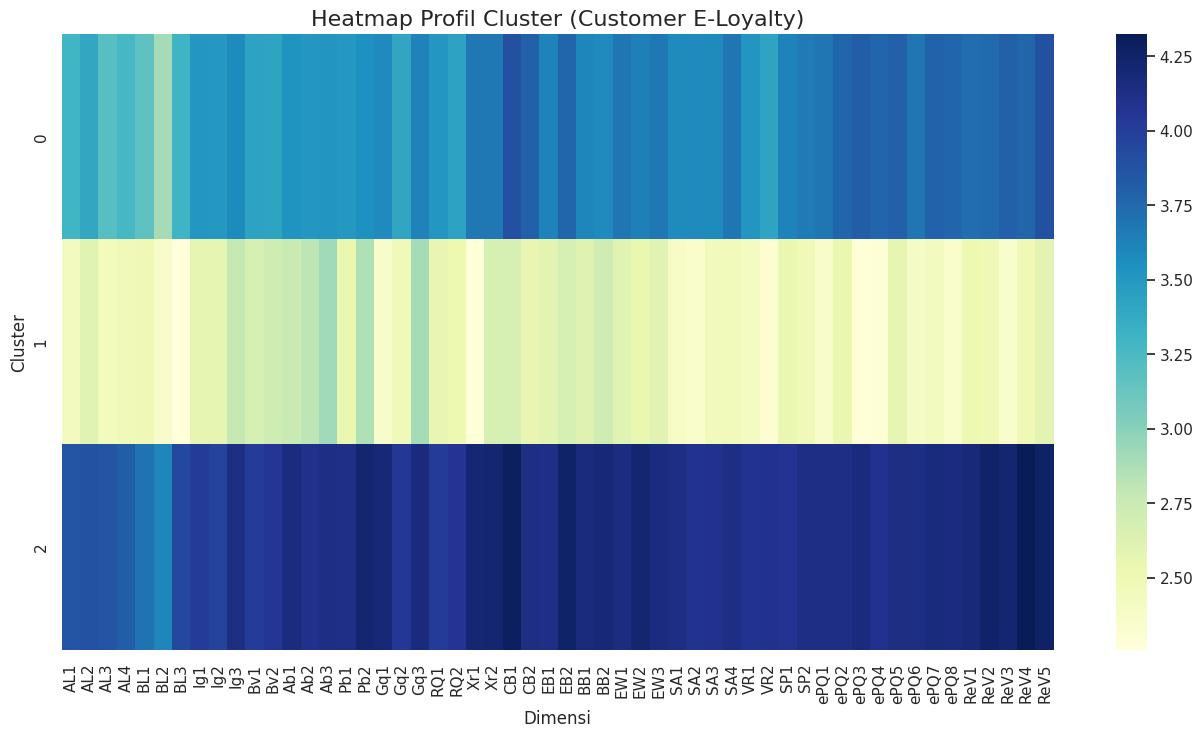

In [53]:
# 9. Membuat Heatmap Profil Cluster

cluster_profile = df.drop(columns=["Nomor"]).groupby("Cluster").mean()

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_profile, annot=False, cmap="YlGnBu", cbar=True)

plt.title("Heatmap Profil Cluster (Customer E-Loyalty)", fontsize=16)
plt.xlabel("Dimensi", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.show()

Profil Cluster (rata-rata skor tiap dimensi):


,AL1,AL2,AL3,AL4,BL1,BL2,BL3,Ig1,Ig2,Ig3,Bv1,Bv2,Ab1,Ab2,Ab3,Pb1,Pb2,Gq1,Gq2,Gq3,RQ1,RQ2,Xr1,Xr2,CB1,CB2,EB1,EB2,BB1,BB2,EW1,EW2,EW3,SA1,SA2,SA3,SA4,VR1,VR2,SP1,SP2,ePQ1,ePQ2,ePQ3,ePQ4,ePQ5,ePQ6,ePQ7,ePQ8,ReV1,ReV2,ReV3,ReV4,ReV5
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.178914,-0.155404,-0.235271,-0.171569,-0.186584,-0.263331,-0.169430,-0.141687,-0.130946,-0.196710,-0.213198,-0.253366,-0.234250,-0.237730,-0.265240,-0.193023,-0.275018,-0.129588,-0.184394,-0.182128,-0.124295,-0.189633,-0.080546,-0.151961,-0.035965,0.000353,-0.115088,-0.095171,-0.158781,-0.200131,-0.096229,-0.153829,-0.106466,-0.123245,-0.080948,-0.113670,-0.061874,-0.141698,-0.187533,-0.091529,-0.073333,-0.048084,-0.017834,0.027222,0.036466,-0.005131,-0.046411,-0.010870,-0.001266,-0.065272,-0.081793,-0.018698,-0.101531,-0.014430
1,-1.228606,-1.181772,-1.097761,-1.127658,-0.977398,-0.846415,-1.317295,-1.338458,-1.374323,-1.267315,-1.204362,-1.171902,-1.239545,-1.167379,-1.082662,-1.363938,-1.139350,-1.473909,-1.201300,-1.095453,-1.213399,-1.237907,-1.736260,-1.412626,-1.510503,-1.435937,-1.349527,-1.417679,-1.367852,-1.275520,-1.464606,-1.513874,-1.493175,-1.575698,-1.530197,-1.477860,-1.470166,-1.463397,-1.497255,-1.455853,-1.514515,-1.587412,-1.597379,-1.768103,-1.678059,-1.481398,-1.516370,-1.589210,-1.541414,-1.552348,-1.535919,-1.723134,-1.547763,-1.511236
2,0.513680,0.477099,0.535788,0.478966,0.453726,0.496566,0.527946,0.505395,0.504130,0.542250,0.542062,0.574220,0.572997,0.557074,0.562242,0.564560,0.587495,0.529611,0.511897,0.481034,0.453943,0.527108,0.550431,0.535869,0.444119,0.387010,0.481287,0.479385,0.530737,0.547948,0.493122,0.565085,0.511257,0.550610,0.495251,0.514463,0.459628,0.539111,0.594933,0.485974,0.483265,0.477210,0.449087,0.449249,0.415541,0.404860,0.456342,0.439789,0.417113,0.485259,0.497656,0.483892,0.520956,0.422381


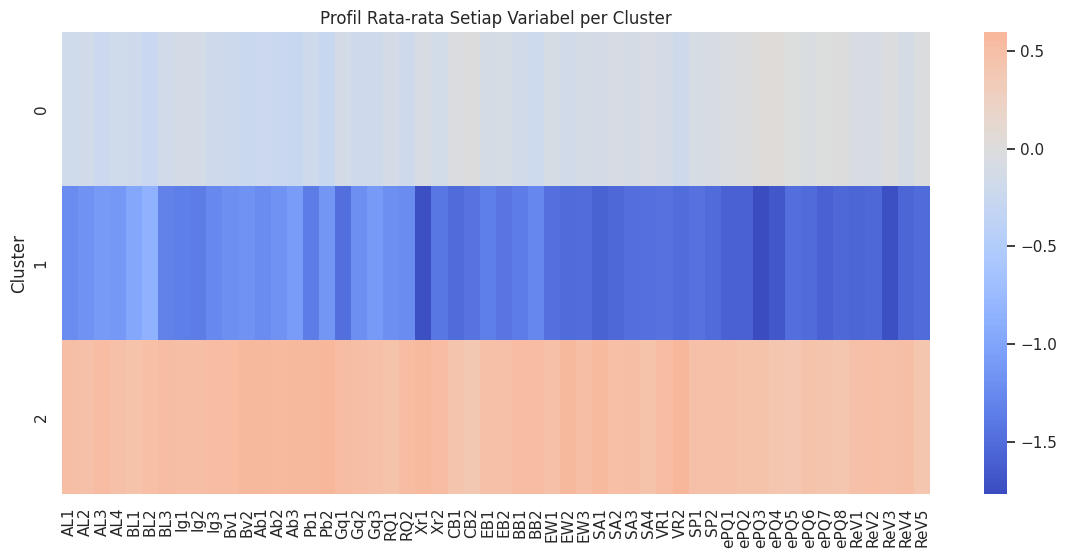

In [54]:
# 10. Profiling Cluster
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled["Cluster"] = labels

profil_mean = df_scaled.groupby("Cluster").mean()

pd.set_option("display.max_columns", None)

print("Profil Cluster (rata-rata skor tiap dimensi):")
display(profil_mean)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.heatmap(profil_mean, cmap="coolwarm", center=0, annot=False)
plt.title("Profil Rata-rata Setiap Variabel per Cluster")
plt.show()




# 11. Interpretasi Deskriptif Hasil Clustering

  # Cluster 0 (Skor Mendekati Rata-rata, Sedikit Negatif)

    *   Rata-rata skor berada sedikit di bawah 0, artinya kelompok ini punya loyalitas yang cukup netral/cenderung biasa-biasa saja.
    *   Tidak ada dimensi yang sangat dominan, sebagian besar stabil dan relatif konsisten.
    *   Karakteristik: pelanggan dengan keterikatan sedang, kemungkinan masih bisa ditingkatkan loyalitasnya dengan strategi promosi atau peningkatan layanan.

  # Cluster 1 (Skor Terendah, Sangat Negatif)

    *   Hampir semua dimensi bernilai jauh di bawah rata-rata (-1 sampai -1.7).
    *   Ini kelompok pelanggan dengan loyalitas terendah, bisa jadi merasa tidak puas atau tidak menemukan nilai lebih dari layanan.
    *   Karakteristik: pelanggan dengan risiko churn (berpindah ke pesaing) sangat tinggi.
    *   Implikasi bisnis: perlu strategi retensi seperti peningkatan kualitas layanan, personalisasi pengalaman, atau program reward yang menarik.

  # Cluster 2 (Skor Positif, Tertinggi)

    *   Semua dimensi bernilai positif dan konsisten tinggi (sekitar +0.4 s.d. +0.6).
    *   Ini kelompok pelanggan dengan loyalitas tinggi, sangat puas dengan berbagai aspek layanan.
    *   Karakteristik: pelanggan inti yang bisa dijadikan brand advocate.
    *   Implikasi bisnis: fokus mempertahankan kelompok ini dengan program VIP, referral, atau eksklusif reward agar tetap loyal.

  # Kesimpulan Strategis

    *   Cluster 2 adalah pelanggan paling setia → pertahankan dan jadikan role model.
    *   Cluster 0 adalah pelanggan "netral" → masih bisa dinaikkan loyalitasnya lewat strategi engagement.
    *   Cluster 1 adalah pelanggan paling berisiko → perlu intervensi cepat agar tidak hilang.

In [55]:
# 12. Evaluasi Clustering

sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(sil_score, 3))

dbi_score = davies_bouldin_score(X_scaled, labels)
print("Davies-Bouldin Index:", round(dbi_score, 3))


Silhouette Score: 0.14
Davies-Bouldin Index: 2.061


# 13. Kesimpulan dan Rekomendasi

  # Kesimpulan

  Berdasarkan hasil analisis menggunakan metode K-Means Clustering pada dataset Customer E-Loyalty Research 2017–2023, diperoleh tiga segmen utama pelanggan. Cluster 0 merepresentasikan kelompok dengan tingkat loyalitas dan pengalaman yang berada pada level sedang. Cluster 1 menunjukkan pelanggan dengan skor relatif rendah pada hampir semua dimensi, yang dapat diinterpretasikan sebagai kelompok dengan tingkat loyalitas dan pengalaman paling lemah. Sebaliknya, Cluster 2 mencerminkan pelanggan dengan skor tinggi di berbagai aspek, termasuk attitudinal loyalty, e-service quality, dan repurchase value, sehingga dapat dikategorikan sebagai pelanggan yang paling loyal dan potensial untuk dijaga.

  Meskipun pembentukan cluster sudah mampu membedakan karakteristik pelanggan, hasil validasi menunjukkan nilai Silhouette Score sebesar 0.14 dan Davies-Bouldin Index sebesar 2.06. Hal ini menandakan bahwa kualitas pemisahan antarcluster masih tergolong moderat, sehingga hasil interpretasi perlu digunakan dengan hati-hati. Namun demikian, analisis ini tetap memberikan gambaran awal yang bermanfaat mengenai segmentasi pelanggan berdasarkan perilaku dan loyalitasnya.

  # Rekomendasi

  Bagi praktisi maupun pengambil keputusan, hasil analisis ini dapat dimanfaatkan untuk menyusun strategi pemasaran yang lebih terarah. Pelanggan pada Cluster 2 sebaiknya difokuskan untuk program retention seperti loyalty rewards atau penawaran eksklusif agar hubungan jangka panjang tetap terjaga. Sementara itu, Cluster 0 dapat ditingkatkan loyalitasnya melalui personalisasi pengalaman, peningkatan kualitas layanan, atau komunikasi yang lebih proaktif. Adapun Cluster 1 memerlukan perhatian khusus karena cenderung memiliki persepsi negatif; strategi yang sesuai bisa berupa peningkatan kualitas layanan dasar, perbaikan kecepatan respons, atau pemberian insentif khusus agar tidak kehilangan kelompok pelanggan ini.

  Untuk penelitian lanjutan, disarankan penggunaan dataset yang lebih beragam serta eksplorasi metode clustering lain seperti Gaussian Mixture Model (GMM) atau Hierarchical Clustering. Selain itu, reduksi dimensi dengan PCA/Factor Analysis yang lebih optimal juga berpotensi menghasilkan pemisahan cluster yang lebih jelas. Dengan langkah-langkah tersebut, analisis di masa mendatang diharapkan dapat menghasilkan model segmentasi yang lebih akurat dan aplikatif bagi industri e-commerce di Indonesia.